# Change Numerical Data Distributions 

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

## Overview

Numerical input variables often exhibit **highly skewed** or **non-standard distributions**, which can arise due to outliers, multi-modal distributions, exponential patterns, or other factors. Many machine learning algorithms perform better when numerical input variables (and output variables in regression tasks) follow a **standard probability distribution**, such as Gaussian (normal) or Uniform.

The **quantile transform** offers an automated approach to reshape the distribution of numerical input variables. By transforming the data into a desired distribution (e.g., Gaussian or Uniform), it can improve the suitability of the data for use as input to predictive models.

## Learning Objectives

- Learn why machine learning algorithms prefer numerical variables with Gaussian or standard probability distributions
- Understand quantile transforms for transforming numerical variables to Gaussian or Uniform distributions 
- Learn how to use `QuantileTransformer` to change probability distributions of numeric variables to improve model performance

### Tasks

- Apply normal quantile transform
- Apply uniform quantile transform  
- Compare model performance with different transforms
- Explore impact of quantile parameters

## Prerequisites

- Basic understanding of Python programming
- Familiarity with NumPy libraries
- Knowledge of basic statistical concepts

## Get Started

To start, we install required packages, import the necessary libraries.

### Install required packages

In [1]:
# This line uses the pip package installer to install the specified Python libraries if they are not already installed.
# matplotlib: A comprehensive library for creating static, interactive, and animated visualizations in Python.
# numpy: NumPy is the fundamental package for scientific computing in Python. It is used for working with arrays.
# pandas: pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames.
# scikit-learn: scikit-learn is a machine learning library that provides tools for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
%pip install matplotlib numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Import necessary libraries

In [2]:
# Import the pyplot module from matplotlib library and alias it as plt for plotting functionalities.
import matplotlib.pyplot as plt

# Import specific functions (exp, mean, std) from the numpy library for numerical operations.
from numpy import exp, mean, std

# Import the randn function from numpy.random module for generating random numbers from a standard normal distribution.
from numpy.random import randn

# Import DataFrame and read_csv functions from the pandas library for data manipulation and reading CSV files.
from pandas import DataFrame, read_csv

# Import RepeatedStratifiedKFold and cross_val_score from sklearn.model_selection for model evaluation using cross-validation.
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Import KNeighborsClassifier from sklearn.neighbors for using the K-Nearest Neighbors classification algorithm.
from sklearn.neighbors import KNeighborsClassifier

# Import Pipeline from sklearn.pipeline for creating a pipeline to chain preprocessing and model steps.
from sklearn.pipeline import Pipeline

# Import LabelEncoder and QuantileTransformer from sklearn.preprocessing for data preprocessing tasks.
from sklearn.preprocessing import LabelEncoder, QuantileTransformer

## Quantile Transforms

A **quantile transform** maps a variable's probability distribution to another probability distribution. By ranking or smoothing the relationship between observations, it can reshape the data to fit a target distribution, such as a **uniform** or **normal (Gaussian)** distribution.

This transformation can be applied to each numeric input variable in the training dataset. Once transformed, the data can be used as input to a machine learning model to improve its performance on predictive tasks.

The quantile transform is implemented in the scikit-learn library via the **`QuantileTransformer`** class, making it easy to apply this technique to your dataset.

We first creates a sample of 1,000 random Gaussian values and adds a skew to the dataset. A histogram is created from the skewed dataset and clearly shows the distribution pushed to the far left.

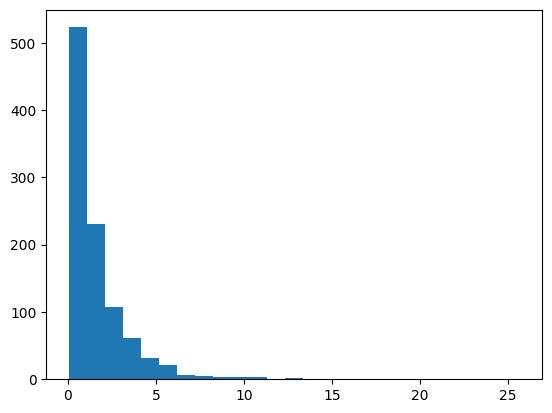

In [3]:
# Demonstration of the quantile transform

# Generate 1000 random numbers from a standard normal distribution (Gaussian distribution) using randn function.
data = randn(1000)

# Apply the exponential function to each data point to introduce a right skew in the distribution.
# Exponential transformation makes positive values larger and compresses negative values towards zero, creating skewness.
data = exp(data)

# Create a histogram plot of the transformed 'data' to visualize its distribution.
# 'bins=25' specifies that the histogram should have 25 bins.
plt.hist(data, bins=25)

# Display the histogram plot.
plt.show()

Next, a **`QuantileTransformer`** is applied to map the skewed data to a **Gaussian distribution** and standardize the results. This centers the values around a **mean of 0** and scales them to a **standard deviation of 1.0**. A histogram of the transformed data is then created, revealing a clear **Gaussian-shaped distribution**.

(1000, 1)


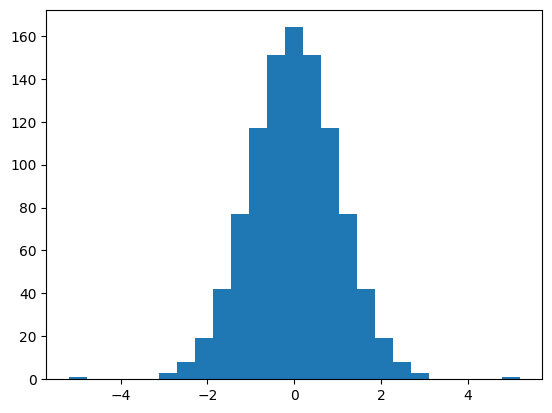

In [4]:
# Reshape the 'data' array to have rows and a single column.
# This is often necessary for scikit-learn transformers that expect 2D input.
data = data.reshape((len(data), 1))

# Print the shape of the reshaped 'data' array.
# This will output the new dimensions, confirming it's now a 2D array with one column.
print(data.shape)

# Initialize a QuantileTransformer object with the output distribution set to 'normal'.
# 'output_distribution="normal"' specifies that the transformed data should follow a normal (Gaussian) distribution as closely as possible.
quantile = QuantileTransformer(output_distribution="normal")

# Fit the QuantileTransformer to the 'data' and then transform 'data'.
# 'fit_transform' learns the quantile information from 'data' and applies the normal quantile transformation.
data_trans = quantile.fit_transform(data)

# Create a histogram of the transformed data 'data_trans'.
# plt.hist(data_trans, bins=25) generates a histogram with 25 bins to visualize the distribution of the transformed data.
plt.hist(data_trans, bins=25)

# Display the histogram plot.
# plt.show() command is used to open a window and display the generated plot.
plt.show()

## Diabetes Dataset

The dataset classifies patient data as
either an onset of diabetes within five years or not. 

```
Number of Instances: 768
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
Missing Attribute Values: Yes
Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")
   Class Value  Number of instances
   0            500
   1            268
```

You can learn more about the dataset here:

* Diabetes Dataset File ([pima-indians-diabetes.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv))
* Diabetes Dataset Details ([pima-indians-diabetes.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names))

### Summarizing the variables from the pima-indians-diabetes dataset

In [5]:
# Define a variable 'pima_indians_diabetes_csv' that stores the file path to the Pima Indians Diabetes dataset CSV file.
pima_indians_diabetes_csv = "../../Data/pima-indians-diabetes.csv"

# load dataset from a CSV file defined by a variable named 'pima_indians_diabetes_csv' into a pandas DataFrame.
# 'header=None' argument indicates that the CSV file does not have a header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Print the first few rows of the DataFrame to get a glimpse of the data.
# By default, head() displays the first 5 rows.
print(dataset.head())

# Print the shape of the DataFrame, which includes the number of rows and columns.
print(dataset.shape)

# Print descriptive statistics for each column in the DataFrame.
# This includes count, mean, std, min, 25%, 50%, 75%, max for numerical columns.
print(dataset.describe())

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

   

This confirms that the dataset consists of **8 input variables**, **1 output variable**, and **768 rows of data**.

Finally, a **histogram** is created for each input variable. If we look past the visual clutter and focus on the histograms themselves, we can observe that many variables exhibit a **skewed distribution**. This makes the dataset an excellent candidate for applying a **quantile transform** to reshape the variables into a more **Gaussian-like distribution**.

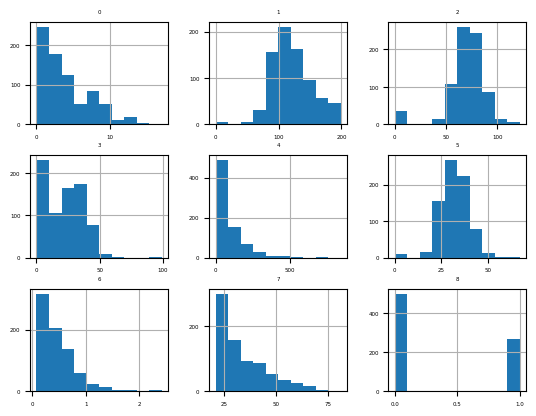

In [6]:
# Create histograms for each variable in the 'dataset' DataFrame.
# 'dataset.hist()' is a pandas function that generates histograms for all numerical columns in the DataFrame.
# 'xlabelsize=4' and 'ylabelsize=4' arguments set the font size of the x and y axis labels to 4 points, making them smaller.
fig = dataset.hist(xlabelsize=4, ylabelsize=4)

# Iterate over each subplot (histogram) in the figure returned by 'dataset.hist()'.
# 'fig' is a NumPy array of matplotlib AxesSubplot objects, where each subplot is a histogram for a column.
# 'fig.ravel()' flattens this array into a 1D array for easy iteration.
# For each subplot 'x', this line sets the title font size to 4 points, making the titles smaller.
# 'x.title' accesses the title object of the subplot.
# 'set_size(4)' sets the font size of the title.
[x.title.set_size(4) for x in fig.ravel()]

# Display the plot.
# 'plt.show()' is a matplotlib function that opens a window and displays all generated figures.
plt.show()

Next, let's **train and evaluate** a machine learning model on the raw dataset. We will use a **k-nearest neighbor (KNN) algorithm** with default hyperparameters and assess its performance using **repeated stratified k-fold cross-validation**. 
- KFold is a cross-validator that divides the dataset into k folds.
- Stratified is to ensure that each fold of dataset has the same proportion of
 observations with a given label.
- Repeated provides a way to improve the estimated performance of a machine learning model.

This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

In [7]:
# Evaluate KNN classifier on the raw dataset

# Load the dataset from the 'pima_indians_diabetes.csv' file using pandas' read_csv function.
# 'header=None' indicates that the CSV file does not have a header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Extract the values from the pandas DataFrame into a NumPy array.
data = dataset.values

# Separate the dataset into input features (X) and output labels (y).
# X is assigned all columns except the last one ([:-1]).
# y is assigned the last column ([-1]), which is assumed to be the target variable.
X, y = data[:, :-1], data[:, -1]

# Ensure that the input features (X) are of float32 data type.
X = X.astype("float32")

# Encode the output labels (y) into integer labels using LabelEncoder.
# fit_transform fits the LabelEncoder to y and then transforms y to numerical labels.
y = LabelEncoder().fit_transform(y.astype("str"))

# Define and configure the model using classifier implementing the k-nearest neighbors vote.
# Define the KNN classifier model.
# KNeighborsClassifier() creates a KNN classifier object with default parameters.
model = KNeighborsClassifier()

# Evaluate the model using RepeatedStratifiedKFold cross validator,
# that repeats Stratified K-Fold n times with different randomization in each
# repetition.
# Define the cross-validation strategy using RepeatedStratifiedKFold.
# n_splits=10:  Divides the dataset into 10 folds.
# n_repeats=3: Repeats the cross-validation process 3 times.
# random_state=1: Sets the random seed for reproducibility.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation.
# model: The KNN classifier model to evaluate.
# X: The input features.
# y: The output labels.
# scoring='accuracy': The metric used to evaluate the model (accuracy in this case).
# cv: The cross-validation strategy defined above (RepeatedStratifiedKFold).
# n_jobs=-1: Use all available CPU cores for parallel execution.
n_scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Print the model's performance.
# mean(n_scores): Calculates the mean accuracy across all folds and repeats.
# std(n_scores): Calculates the standard deviation of the accuracy scores.
# "Accuracy: %.3f (%.3f)": Formats the output string to display the mean and standard deviation rounded to 3 decimal places.
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


In this case we can see that the model achieved a mean classification accuracy of about 71.7 percent.

## Normal Quantile Transform

Transforming an input variable to have a **normal (Gaussian) probability distribution** can often improve modeling performance. To achieve this, we can apply the **Quantile Transform** using the `QuantileTransformer` class. 

When configuring the transformer:
- Set the `output_distribution` argument to `'normal'` to ensure the data is mapped to a Gaussian distribution.
- Set the `n_quantiles` argument to a value smaller than the number of observations in the training dataset (e.g., 100 in this case).

Once configured, we can call the `fit_transform()` function and pass our dataset to it, creating a quantile-transformed version of the data.

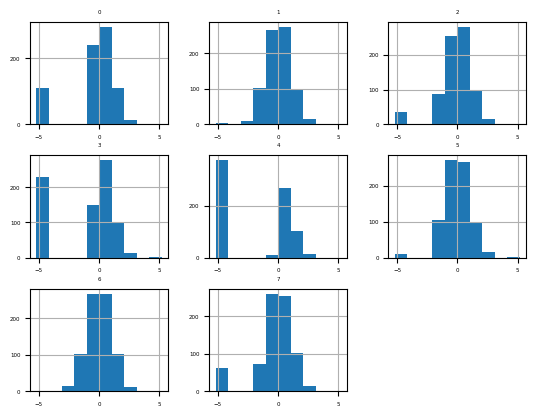

In [8]:
# Visualize a normal quantile transform of the dataset

# Load the Pima Indians Diabetes dataset from the CSV file 'pima_indians_diabetes_csv' into a pandas DataFrame.
# 'header=None' indicates that the CSV file does not have a header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Extract the numpy array of values from the DataFrame and select all rows (:) and all columns except the last one (:-1).
# This assumes the last column is the target variable and the preceding columns are input features.
data = dataset.values[:, :-1]

# Perform a normal quantile transform of the dataset 'n_quantiles" is the number
# of quantiles to be computed. It corresponds to the number of landmarks used to
# discretize the cumulative distribution function.  'output_distribution" is the
# marginal distribution for the transformed data. The choices are 'uniform'
# (default) or 'normal'.
# Initialize a QuantileTransformer object.
# 'n_quantiles=100' sets the number of quantiles to 100, controlling the granularity of the transformation.
# 'output_distribution="normal"' specifies that the transformed data should follow a normal distribution.
trans = QuantileTransformer(n_quantiles=100, output_distribution="normal")

# Fit the QuantileTransformer to the input data and then transform the data.
# 'fit_transform' learns the quantile mapping from the data and applies the transformation.
data = trans.fit_transform(data)

# Convert the transformed numpy array 'data' back into a pandas DataFrame.
dataset = DataFrame(data)

# Create histograms for each variable (column) in the DataFrame.
# 'xlabelsize=4' and 'ylabelsize=4' set the font size of the x and y axis labels to 4 for better readability in the plot.
fig = dataset.hist(xlabelsize=4, ylabelsize=4)

# Iterate over each histogram subplot in the figure and set the title font size to 4.
# 'fig.ravel()' flattens the array of subplots into a 1D array.
# 'x.title.set_size(4)' sets the font size of the title for each subplot.
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
# Display the generated histograms plot.
plt.show()

We can observe that the **histograms** for each variable now exhibit a **Gaussian-like shape**, a significant improvement compared to the raw data.

Next, let's evaluate the same **k-nearest neighbor (KNN) model** as before, but this time using the **normal quantile-transformed version** of the dataset.

In [9]:
# Evaluate KNN with normal quantile transform

# Load dataset from the specified CSV file 'pima_indians_diabetes_csv' without a header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Extract the values from the pandas DataFrame into a NumPy array.
data = dataset.values

# Separate the data into input features (X) and output target (y) columns.
# X gets all columns except the last one ([:-1]).
# y gets only the last column ([:, -1]).
X, y = data[:, :-1], data[:, -1]

# Ensure inputs (X) are of float32 data type for numerical operations.
X = X.astype("float32")

# Encode the output labels (y) into integer labels using LabelEncoder.
# fit_transform fits the LabelEncoder to y and then transforms y to encoded labels.
y = LabelEncoder().fit_transform(y.astype("str"))

# Define the quantile transformer to transform features to a normal distribution.
# n_quantiles=100 specifies the number of quantiles to use in the transformation.
# output_distribution="normal" specifies that the output should be a normal distribution.
trans = QuantileTransformer(n_quantiles=100, output_distribution="normal")

# Define the model, using KNeighborsClassifier which is a k-nearest neighbors classifier.
model = KNeighborsClassifier()

# Create a pipeline that first applies the quantile transformation (trans) and then the KNN model (model).
# steps=[("t", trans), ("m", model)] defines the steps in the pipeline with names 't' for transformer and 'm' for model.
pipeline = Pipeline(steps=[("t", trans), ("m", model)])

# Define cross-validation configuration using RepeatedStratifiedKFold.
# n_splits=10 means 10 folds for cross-validation.
# n_repeats=3 means repeat cross-validation 3 times.
# random_state=1 ensures reproducibility of the cross-validation splits.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the pipeline using cross_validation.
# pipeline is the defined pipeline to evaluate.
# X is the input data, y is the target data.
# scoring="accuracy" specifies that accuracy is the metric to evaluate.
# cv=cv uses the defined RepeatedStratifiedKFold for cross-validation.
# n_jobs=-1 uses all available CPU cores for parallel processing to speed up cross-validation.
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report the pipeline performance.
# mean(n_scores) calculates the average accuracy across all cross-validation folds and repeats.
# std(n_scores) calculates the standard deviation of the accuracy scores.
# "Accuracy: %.3f (%.3f)" is a format string to print the mean and standard deviation, rounded to 3 decimal places.
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


We can see that applying the **normal quantile transform** results in a **performance improvement**, increasing the accuracy from **71.7%** (without the transform) to approximately **73.4%** (with the transform).

## Uniform Quantile Transform

In some cases, transforming a highly **exponential** or **multi-modal distribution** into a **uniform distribution** can be beneficial. This is particularly useful for datasets with a **wide and sparse range of values**, such as those containing common outliers rather than rare ones.

To apply this transform, we can use the `QuantileTransformer` class and set the `output_distribution` argument to `'uniform'` (which is the default setting).

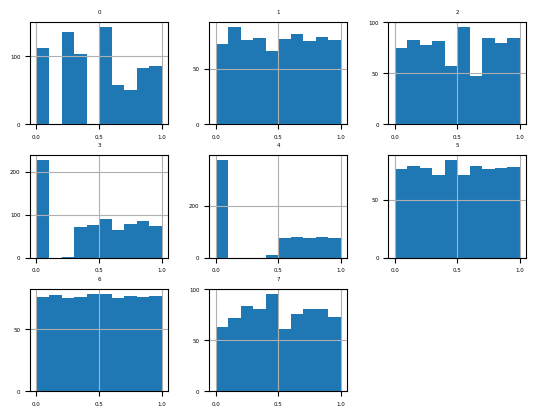

In [10]:
# Visualize a uniform quantile transform of the dataset

# Load the Pima Indians Diabetes dataset from a CSV file named 'pima_indians_diabetes_csv' into a pandas DataFrame.
# 'header=None' indicates that the CSV file has no header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Extract all rows and all columns except the last one (which is assumed to be the target variable).
# ':,' selects all rows, and ':-1' selects all columns up to, but not including, the last column.
data = dataset.values[:, :-1]

# Perform a uniform quantile transform of the dataset
# Initialize a QuantileTransformer object.
# 'n_quantiles=100' specifies that the data should be mapped to 100 quantiles.
# 'output_distribution="uniform"' sets the output distribution to be uniform, meaning values will be spread evenly between 0 and 1.
trans = QuantileTransformer(n_quantiles=100, output_distribution="uniform")

# Fit the QuantileTransformer to the data and then transform the data.
# 'fit_transform' learns the quantile mapping from the input data and applies the transformation.
data = trans.fit_transform(data)

# Convert the NumPy array 'data' back into a pandas DataFrame.
# This is done to easily use pandas' plotting capabilities for histograms.
dataset = DataFrame(data)

# Create histograms for each column (variable) in the DataFrame.
# 'xlabelsize=4' and 'ylabelsize=4' set the font size of the x and y axis labels to 4.
fig = dataset.hist(xlabelsize=4, ylabelsize=4)

# Reduce the size of the titles of each histogram subplot.
# 'fig.ravel()' flattens the array of subplots returned by 'dataset.hist()'.
# '[x.title.set_size(4) for x in fig.ravel()]' iterates through each subplot and sets the title size to 4.
[x.title.set_size(4) for x in fig.ravel()]

# Display the generated histograms plot.
plt.show()

We can observe that the **histograms** for each variable now exhibit a **uniform shape**, a significant change compared to the raw data.

Next, let's evaluate the same **k-nearest neighbor (KNN) model** as before, but this time using the **uniform quantile-transformed version** of the dataset.

In [11]:
# Evaluate KNN classifier on the dataset with uniform quantile transform

# Load the Pima Indians Diabetes dataset from a CSV file named 'pima_indians_diabetes_csv' using pandas.
# 'header=None' indicates that the CSV file does not have a header row.
dataset = read_csv(pima_indians_diabetes_csv, header=None)

# Extract the values from the pandas DataFrame and store them in a NumPy array called 'data'.
data = dataset.values

# Separate the dataset into input features (X) and output labels (y).
# X is assigned all columns except the last one ([:-1]).
# y is assigned the last column ([-1]).
X, y = data[:, :-1], data[:, -1]

# Ensure that the input features (X) are of float32 data type.
X = X.astype("float32")

# Encode the output labels (y) into integer labels using LabelEncoder.
# 'astype("str")' is used to handle potential mixed data types in the label column before encoding.
y = LabelEncoder().fit_transform(y.astype("str"))

# Define a QuantileTransformer for preprocessing.
# 'n_quantiles=100' specifies the number of quantiles to use for transformation.
# 'output_distribution="uniform"' sets the output distribution to be uniform after transformation.
trans = QuantileTransformer(n_quantiles=100, output_distribution="uniform")

# Define a KNeighborsClassifier model.
model = KNeighborsClassifier()

# Create a pipeline that first applies the QuantileTransformer (trans) and then the KNeighborsClassifier (model).
# The steps are named 't' for transformer and 'm' for model.
pipeline = Pipeline(steps=[("t", trans), ("m", model)])

# Define a RepeatedStratifiedKFold cross-validation strategy.
# 'n_splits=10' specifies 10 folds for each cross-validation iteration.
# 'n_repeats=3' specifies to repeat the cross-validation 3 times.
# 'random_state=1' ensures reproducibility of the shuffling in cross-validation.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the pipeline using cross-validation.
# 'pipeline' is the estimator to evaluate.
# 'X' is the input data.
# 'y' is the target data.
# 'scoring="accuracy"' specifies that accuracy is the metric to evaluate.
# 'cv=cv' uses the RepeatedStratifiedKFold cross-validation strategy defined earlier.
# 'n_jobs=-1' uses all available CPU cores for parallel processing.
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report the performance of the pipeline.
# 'mean(n_scores)' calculates the average accuracy across all cross-validation folds and repeats.
# 'std(n_scores)' calculates the standard deviation of the accuracy scores.
# "Accuracy: %.3f (%.3f)" is a format string to print the mean and standard deviation, rounded to 3 decimal places.
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


We can observe that the **uniform transform** improves model performance, increasing accuracy from **71.7%** (without the transform) to **73.4%** (with the normal transform) and achieving a score of **74.1%** (with the uniform transform).

The number of quantiles (set to **100** in this case) was chosen arbitrarily. This hyperparameter can be **tuned** to explore how the resolution of the transform affects model performance. The example below demonstrates this by evaluating the **mean accuracy** for different `n_quantiles` values ranging from **1 to 99** and plotting the results.

In [12]:
# Explore number of quantiles on classification accuracy

# Define a function named 'get_dataset' that takes a 'filename' as input.
def get_dataset(filename):
    # Load the dataset from a CSV file specified by 'filename' into a pandas DataFrame.
    # 'header=None' argument indicates that the CSV file does not have a header row.
    dataset = read_csv(filename, header=None)
    
    # Convert the pandas DataFrame 'dataset' into a NumPy array 'data'.
    data = dataset.values
    
    # Split the 'data' array into input features (X) and output labels (y).
    # '[:, :-1]' selects all rows and all columns except the last one for input features (X).
    # '[:, -1]' selects all rows and only the last column for output labels (y).
    X, y = data[:, :-1], data[:, -1]
    
    # Convert the input features 'X' to float32 data type.
    X = X.astype("float32")
    
    # Encode the output labels 'y' using LabelEncoder to convert string labels to numerical labels.
    y = LabelEncoder().fit_transform(y.astype("str"))
    
    # Return the processed input features 'X' and output labels 'y'.
    return X, y


# Define a function named 'get_models' to create and return a dictionary of machine learning models (pipelines).
def get_models():
    # Initialize an empty dictionary called 'models' to store the pipelines, where keys will be the number of quantiles and values will be the pipelines themselves.
    models = dict()
    
    # Loop through numbers from 1 to 99 (inclusive), where each number 'i' represents the number of quantiles for the QuantileTransformer.
    for i in range(1, 100):
        # define the pipeline
        # Create a QuantileTransformer object named 'trans' to transform the input features using quantiles.
        trans = QuantileTransformer(n_quantiles=i, output_distribution="uniform")
        
        # Create a KNeighborsClassifier object named 'model' which will be used as the classification model in the pipeline.
        model = KNeighborsClassifier()
        
        # The purpose of the pipeline is to assemble several steps that can be
        # cross-validated together while setting different parameters.
        # Create a Pipeline object that chains together the QuantileTransformer ('trans') and KNeighborsClassifier ('model').
        # The pipeline is stored in the 'models' dictionary with the number of quantiles 'i' as the key (converted to a string).
        models[str(i)] = Pipeline(steps=[("t", trans), ("m", model)])
        
    # Return the 'models' dictionary containing all the created pipelines.
    return models


# Define a function named 'evaluate_model' that takes a machine learning 'model', input features 'X', and output labels 'y' as input.
def evaluate_model(model, X, y):
    # Create a RepeatedStratifiedKFold cross-validation object named 'cv'.
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Perform cross-validation using 'cross_val_score' to evaluate the 'model'.
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    
    # Return the list of accuracy scores obtained from cross-validation.
    return scores

# define dataset
# Call the get_dataset function to load and prepare the dataset, and unpack the features (X) and labels (y)
X, y = get_dataset(pima_indians_diabetes_csv)

# get the models to evaluate
# Call the function `get_models()` to retrieve a dictionary of machine learning models that will be evaluated.
models = get_models()

# Initialize an empty list called 'results' to store the mean accuracy scores for each model.
results = list()
# Start a loop that iterates through the 'models' dictionary. 'models.items()' returns key-value pairs (name, model).
for name, model in models.items():
    # Evaluate the current 'model' using the 'evaluate_model' function with the dataset (X, y).
    # The 'evaluate_model' function performs cross-validation and returns a list of accuracy scores.
    scores = evaluate_model(model, X, y)
    
    # Calculate the mean of the 'scores' list (which represents the average accuracy from cross-validation) and append it to the 'results' list.
    results.append(mean(scores))
    
    # Print the performance of the current model.
    # '>%s %.3f (%.3f)' is a format string:
    #   - '%s' will be replaced by the 'name' of the model (which is the number of quantiles in this case).
    #   - '%.3f' will be replaced by the mean accuracy, formatted to 3 decimal places.
    #   - '%.3f' will be replaced by the standard deviation of the accuracy scores, formatted to 3 decimal places.
    print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))

>1 0.410 (0.121)
>2 0.738 (0.053)
>3 0.732 (0.056)
>4 0.733 (0.057)
>5 0.742 (0.054)
>6 0.738 (0.050)
>7 0.740 (0.052)
>8 0.739 (0.056)
>9 0.747 (0.053)
>10 0.742 (0.051)
>11 0.731 (0.058)
>12 0.735 (0.049)
>13 0.740 (0.052)
>14 0.735 (0.048)
>15 0.737 (0.055)
>16 0.734 (0.051)
>17 0.740 (0.051)
>18 0.738 (0.049)
>19 0.740 (0.051)
>20 0.739 (0.049)
>21 0.737 (0.047)
>22 0.741 (0.049)
>23 0.737 (0.048)
>24 0.737 (0.048)
>25 0.737 (0.049)
>26 0.739 (0.048)
>27 0.738 (0.047)
>28 0.740 (0.050)
>29 0.743 (0.050)
>30 0.739 (0.045)
>31 0.736 (0.052)
>32 0.738 (0.048)
>33 0.736 (0.045)
>34 0.737 (0.049)
>35 0.741 (0.044)
>36 0.739 (0.049)
>37 0.736 (0.053)
>38 0.737 (0.046)
>39 0.741 (0.053)
>40 0.736 (0.048)
>41 0.736 (0.047)
>42 0.739 (0.052)
>43 0.737 (0.052)
>44 0.740 (0.050)
>45 0.737 (0.050)
>46 0.739 (0.051)
>47 0.739 (0.044)
>48 0.737 (0.052)
>49 0.740 (0.048)
>50 0.737 (0.049)
>51 0.740 (0.049)
>52 0.737 (0.046)
>53 0.739 (0.047)
>54 0.738 (0.048)
>55 0.740 (0.050)
>56 0.739 (0.051)
>

In this case, we observe that **surprisingly smaller values** for `n_quantiles` resulted in better accuracy. For example, a value of **9** achieved an accuracy of approximately **74.7%**.

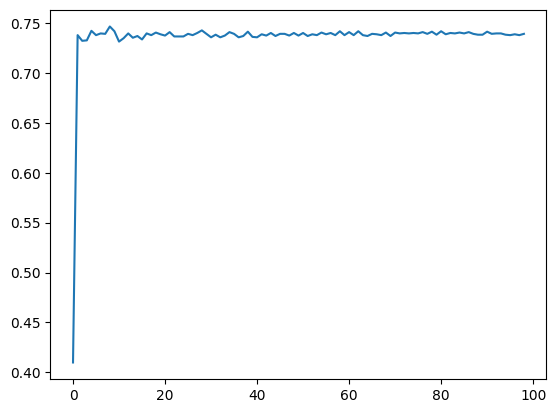

In [13]:
# Plot model performance for comparison
# Plot the 'results' data. Assuming 'results' is a list or array of performance metrics (e.g., accuracy scores) from different models or configurations.
plt.plot(results)
# Display the plot created by plt.plot(). This will open a window showing the graph.
plt.show()

A **line plot** is created to visualize the relationship between the **number of quantiles** used in the transform and the **classification accuracy** of the resulting model. The plot shows a noticeable **performance bump** for values less than **10**, followed by a **drop in accuracy** for larger values. These results suggest that exploring different **distributions** and **quantile resolutions** could potentially lead to further improvements in model performance.

## Conclusion

In this tutorial, we explored the transformation of numerical input variables that exhibit skewed or non-standard distributions due to factors like outliers, multi-modal patterns, or exponential distributions. Then we explored the performance of machine learning algorithms both with and without transformation. 

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.